# Local Mean Surface Temperature
Calculates mean surface temperature from either the average or the difference of the daily maximum temperature and minimum temperature at Koror station
## Requirements: 
Run downloadGHCNd.ipynb located /1_atmosphere/downloadGHCnd.ipynb to download the required GHCNd data

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
# from datetime import date

In [2]:
for x in os.listdir("../../GHCNd/pkl/"):
    if x[-4:] == ".pkl" and "_PALAU." not in x:
        if "AIRTEMP" in x:
            curr_df = pd.read_pickle("../../GHCNd/pkl/" + x)
            if datetime.strptime(str(curr_df["DATE"][0]), '%Y-%m-%d') < datetime(1960, 12, 31) and datetime.strptime(str(max(curr_df["DATE"])), '%Y-%m-%d') > datetime(1990, 12, 31):
                print( "VALID : " + x)
            else:
                
                print("INVALID : " + x)
            print(curr_df["DATE"][0],curr_df["DATE"][len(curr_df['DATE'])-1])
            print(min(curr_df["DATE"]),max(curr_df["DATE"]))

INVALID : AIRTEMP_PELELIU_PSC00914712.pkl
1991-06-01 2023-11-30
1991-06-01 2023-11-30
INVALID : AIRTEMP_AIMELIK_BABELTHUAP_PSC00914015.pkl
1954-07-01 1955-08-31
1954-07-01 1955-08-31
INVALID : AIRTEMP_PELELIU_ISLAND_PALAU_ISLANDS_PSW00040305.pkl
1945-05-01 1947-05-31
1945-05-01 1947-05-31
INVALID : AIRTEMP_KOROR_ISLAND_NF_PSW00040307.pkl
1947-07-11 1951-03-31
1947-07-11 1951-03-31
INVALID : AIRTEMP_NGASANG_BABELTHUAP_PSC00914580.pkl
1972-05-01 1978-12-24
1972-05-01 1978-12-24
INVALID : AIRTEMP_NEKKEN_FORESTRY_PSC00914519.pkl
1983-05-01 2023-11-30
1983-05-01 2023-11-30
VALID : AIRTEMP_KOROR_PSW00040309.pkl
1951-07-01 2024-01-07
1951-07-01 2024-01-07
INVALID : AIRTEMP_MARICULTURE_CENTER_PSC00914478.pkl
1990-04-02 2004-02-27
1990-04-02 2004-02-27
INVALID : AIRTEMP_WEATHER_SERVICE_OFFICE_PALAU_PSC00914913.pkl
2004-01-01 2024-01-07
2004-01-01 2024-01-07
INVALID : AIRTEMP_ANGUAR_PSC00914030.pkl
1955-07-08 1974-03-31
1955-07-08 1974-03-31


In [3]:
df = pd.read_pickle("../../GHCND/pkl/AIRTEMP_KOROR_PSW00040309.pkl")

In [4]:
#There is an issue when downloading the data through https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/
#You can see that the TMIN is wrong, it would be too cold for Palau if it was Kelvin, it is because the
#decimal point is missing from the data
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",322.0,239.0,NaN
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",317.0,244.0,NaN
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,239.0,NaN
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",289.0,233.0,NaN
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",311.0,239.0,NaN
...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,261.0,NaN
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,261.0,NaN
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",294.0,267.0,NaN
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",306.0,256.0,NaN


In [9]:
df['TMAX'] = df['TMAX']/10
df['TMIN'] = df['TMIN']/10

In [10]:
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",32.2,23.9,NaN
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",31.7,24.4,NaN
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,23.9,NaN
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",28.9,23.3,NaN
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",31.1,23.9,NaN
...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",29.4,26.7,NaN
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,25.6,NaN


In [11]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [12]:
df['DAY'] = "2024-" + df['DATE'].dt.strftime('%m-%d')

In [13]:
df['DAY'] = pd.to_datetime(df['DAY'], format='%Y-%m-%d')

In [14]:
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS,DAY
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",32.2,23.9,NaN,2024-07-01
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",31.7,24.4,NaN,2024-07-02
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,23.9,NaN,2024-07-03
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",28.9,23.3,NaN,2024-07-04
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",31.1,23.9,NaN,2024-07-05
...,...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-12-18
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-01-03
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",29.4,26.7,NaN,2024-01-04
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,25.6,NaN,2024-01-05


In [15]:
from pandas import Timestamp

In [18]:
import matplotlib.pyplot as plt

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [20]:
df['YEAR'] = df['DATE'].dt.year

In [21]:
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMIN,TOBS,DAY,YEAR
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",32.2,23.9,NaN,2024-07-01,1951
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",31.7,24.4,NaN,2024-07-02,1951
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,23.9,NaN,2024-07-03,1951
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",28.9,23.3,NaN,2024-07-04,1951
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",31.1,23.9,NaN,2024-07-05,1951
...,...,...,...,...,...,...,...,...,...,...,...
25810,PSW00040309,2023-12-18,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-12-18,2023
25811,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,26.1,NaN,2024-01-03,2024
25812,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",29.4,26.7,NaN,2024-01-04,2024
25813,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",30.6,25.6,NaN,2024-01-05,2024


In [22]:
average_tmin_by_year = df.groupby('YEAR')['TMIN'].mean()
average_tmax_by_year = df.groupby('YEAR')['TMAX'].mean()

In [23]:
average_tmax_by_year

YEAR
1951    30.924457
1952    30.904645
1953    31.039726
1954    31.084384
1955    30.741918
          ...    
2020    29.885036
2021    28.618414
2022    29.917466
2023    30.068015
2024    30.300000
Name: TMAX, Length: 74, dtype: float64

In [24]:
average_tmin_by_year

YEAR
1951    24.150543
1952    23.837978
1953    24.088767
1954    25.000548
1955    23.756986
          ...    
2020    25.131752
2021    24.745042
2022    24.541781
2023    25.500368
2024    25.850000
Name: TMIN, Length: 74, dtype: float64

In [25]:
mean_diff = average_tmax_by_year - average_tmin_by_year

In [26]:
mean_diff.values

array([6.77391304, 7.06666667, 6.9509589 , 6.08383562, 6.98493151,
       6.66857923, 6.61506849, 6.60273973, 6.45232877, 6.60081967,
       6.24493151, 6.33890411, 6.45890411, 6.44863388, 6.11068493,
       6.46684932, 6.46356164, 6.75027322, 6.46657534, 6.61315068,
       6.74164384, 6.74289617, 7.0169863 , 6.9090411 , 6.95506849,
       6.59043716, 6.59972603, 6.81068493, 7.00328767, 7.04945355,
       7.02630137, 6.39671233, 6.8490411 , 7.0215847 , 7.04082192,
       6.9309589 , 7.01917808, 7.05409836, 7.02164384, 6.77589041,
       6.67534247, 6.95956284, 6.96547945, 6.92054795, 7.41315068,
       7.29344262, 7.28328767, 8.00958904, 7.6       , 7.86693989,
       6.98109589, 6.92191781, 6.7739726 , 6.61912568, 6.96931507,
       6.81835616, 7.03616438, 6.40546448, 6.29726027, 6.92410959,
       6.02958904, 6.05      , 6.55589041, 6.07479452, 6.56493151,
       6.52540984, 6.36657534, 6.26146497, 6.37333333, 4.75328467,
       3.8733711 , 5.37568493, 4.56764706, 4.45      ])

In [27]:
mean_diff_bar = mean_diff.loc[1961:1990].mean()

In [39]:
mean_diff_anomaly = mean_diff-mean_diff_bar

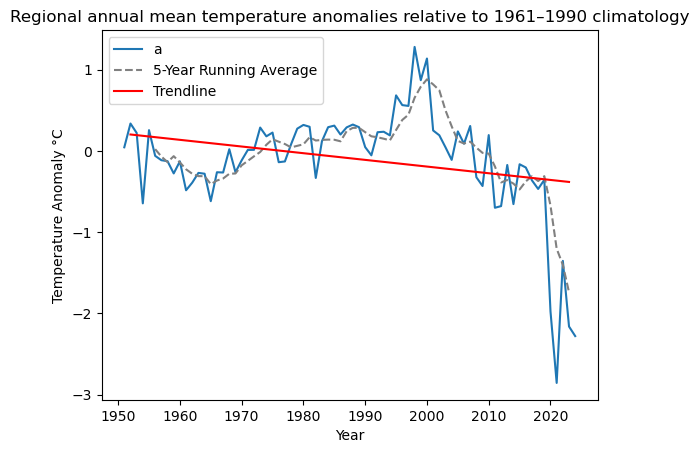

In [40]:
running_avg = mean_diff_anomaly[1:-1].rolling(window=5).mean()
# Plot the original data
plt.plot(mean_diff_anomaly.index,mean_diff_anomaly.values, label = "a")
# Plot the five-year running average as a dashed line
plt.plot(running_avg.index, running_avg.values, linestyle='--',color="grey", label='5-Year Running Average')

z = np.polyfit(mean_diff_anomaly[1:-1].index, mean_diff_anomaly[1:-1].values, 1)  # Fit a linear trendline

p = np.poly1d(z)  # Create a polynomial function for the trendline
plt.plot(mean_diff_anomaly[1:-1].index, p(mean_diff_anomaly[1:-1].index), label='Trendline', color="red")

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly °C')
plt.legend()
plt.title("Regional annual mean temperature anomalies relative to 1961–1990 climatology")
# Show the plot
plt.savefig('historical-local-extreme-diff-surface-temp-anom.png', format='png',dpi=300,facecolor='white')

plt.show()

In [31]:
mean_average = ((average_tmax_by_year + average_tmin_by_year)/2)

In [32]:
mean_average

YEAR
1951    27.537500
1952    27.371311
1953    27.564247
1954    28.042466
1955    27.249452
          ...    
2020    27.508394
2021    26.681728
2022    27.229623
2023    27.784191
2024    28.075000
Length: 74, dtype: float64

In [33]:
mean_average_bar = mean_average.loc[1961:1990].mean()
mean_average_anomaly = mean_average-mean_average_bar

In [34]:
mean_average_anomaly

YEAR
1951   -0.069683
1952   -0.235871
1953   -0.042936
1954    0.435283
1955   -0.357731
          ...   
2020   -0.098789
2021   -0.925455
2022   -0.377560
2023    0.177008
2024    0.467817
Length: 74, dtype: float64

In [35]:
running_avg = mean_average_anomaly[1:-1].rolling(window=5).mean()

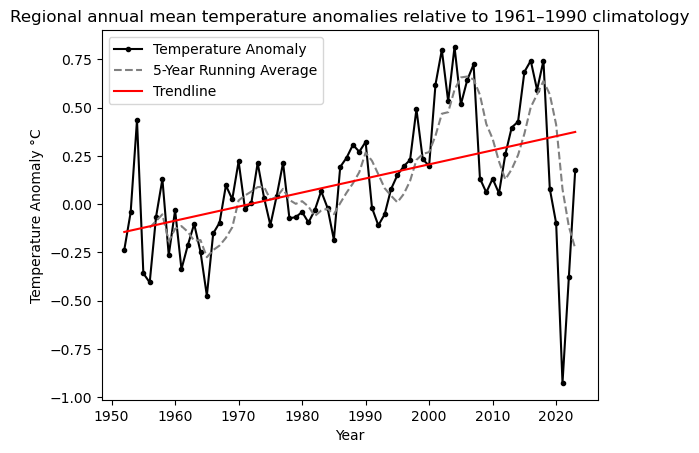

In [36]:
# Plot the original data
plt.plot(mean_average_anomaly[1:-1].index, mean_average_anomaly[1:-1].values, marker= 'o',color="black",markersize =3,label='Temperature Anomaly')

# Plot the five-year running average as a dashed line
plt.plot(running_avg.index, running_avg.values, linestyle='--',color="grey", label='5-Year Running Average')

z = np.polyfit(mean_average_anomaly[1:-1].index, mean_average_anomaly[1:-1].values, 1)  # Fit a linear trendline

p = np.poly1d(z)  # Create a polynomial function for the trendline
plt.plot(mean_average_anomaly[1:-1].index, p(mean_average_anomaly[1:-1].index), label='Trendline', color="red")

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly °C')
plt.legend()
plt.title("Regional annual mean temperature anomalies relative to 1961–1990 climatology")
plt.savefig('historical-local-mean-surface-temp-anom.png', format='png',dpi=300,facecolor='white')
# Show the plot
plt.show()

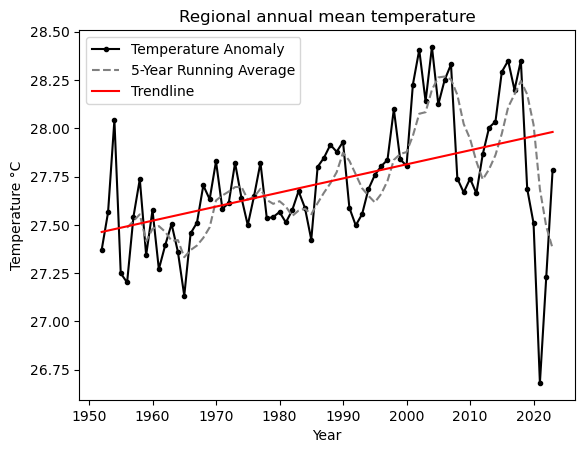

In [38]:
temp_table = {}
running_avg = mean_average[1:-1].rolling(window=5).mean()

# Plot the original data
plt.plot(mean_average[1:-1].index, mean_average[1:-1].values, marker= 'o',color="black",markersize =3,label='Temperature Anomaly')

# Plot the five-year running average as a dashed line
plt.plot(running_avg.index, running_avg.values, linestyle='--',color="grey", label='5-Year Running Average')

z = np.polyfit(mean_average[1:-1].index, mean_average[1:-1].values, 1)  # Fit a linear trendline

p = np.poly1d(z)  # Create a polynomial function for the trendline
plt.plot(mean_average[1:-1].index, p(mean_average[1:-1].index), label='Trendline', color="red")

temp_table["Annual mean daily mean temperature"] = z[0]*10
# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.legend()
plt.title("Regional annual mean temperature")
plt.savefig('historical-local-mean-surface-temp.png', format='png',dpi=300,facecolor='white')
# Show the plot
plt.show()